# Tesla Stock Price

### Dataset Introduction

**Tesla Stock Price Dataset**

- **Source and Content:** This dataset, provided by Kaggle user Ricardo Aguirre, contains historical stock market data for Tesla Inc.
- **Key Features:** The dataset typically includes daily stock information such as opening price, highest price, lowest price, closing price, and volume.
- **Time Span:** The dataset covers a specific historical period, usually spanning several years of stock market data.
- **Usage:** Such data is commonly used for time series analysis, market trend forecasting, risk management, and developing algorithmic trading strategies.

### Stock Trend Prediction Using LSTM

**Long Short-Term Memory Networks (LSTM)**

- **Basic Concept:** LSTM is a special type of Recurrent Neural Network (RNN) ideally suited for processing and predicting time series data, like stock prices.
- **Advantages:** Compared to traditional RNNs, LSTM can better learn long-term dependencies and avoids the vanishing gradient problem.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# import data
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
#Check for null values in the data set
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
#We can see that the data in 'Close' and 'Adj Close' are exactly the same, so we delete the last column 'Adj Close'.
different_rows = data['Close'] != data['Adj Close']
count_different = different_rows.sum()
print(f"different rows: {count_different}")
data.drop(columns=['Adj Close'], inplace=True)
data.head()

different rows: 0


,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [7]:
# set format to date
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [8]:
# define a function to show price
def show_price(data):
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['Open'], label='Open Price')
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['High'], label='High Price')
    plt.plot(data['Date'], data['Low'], label='Low Price')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.show()

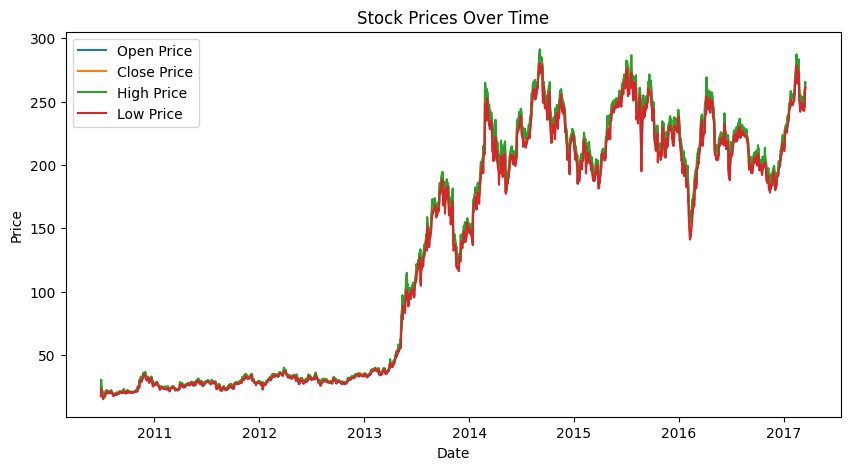

In [9]:
# showing all the data in the data set.
show_price(data)

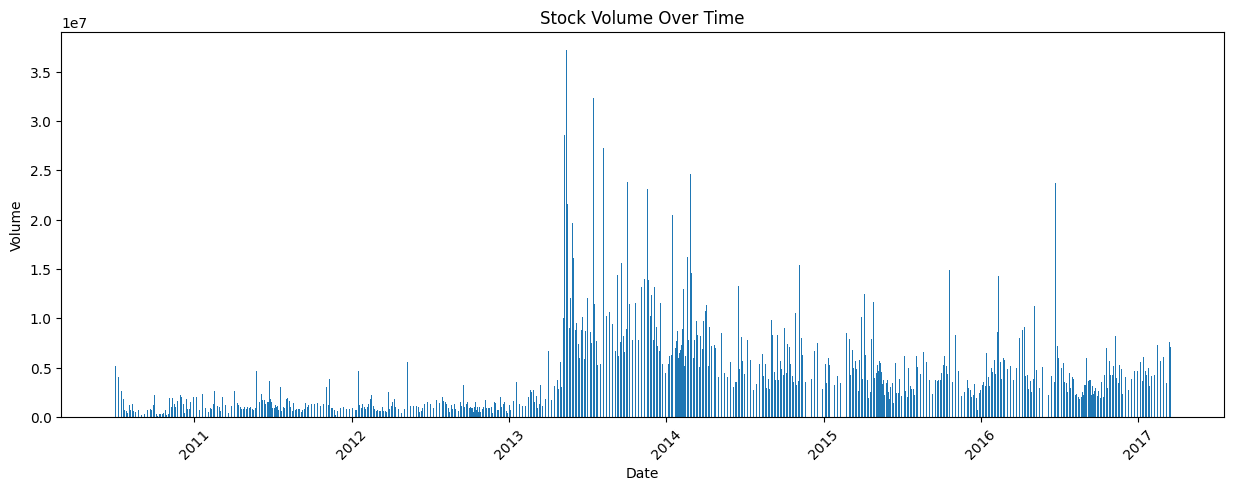

In [10]:
plt.figure(figsize=(15, 5))
plt.bar(data['Date'], data['Volume'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.xticks(rotation=45)
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Select features to use
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Divide training set and test set
split = int(0.8 * len(data))
X_train = scaled_features[:split]
X_test = scaled_features[split:]
y_train = scaled_target[:split]
y_test = scaled_target[split:]
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=0)
y_actual = scaler.inverse_transform(y_test)

# Adjust the data format to fit the LSTM model (number of samples, time steps, number of features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


# train
model.fit(X_train, y_train, epochs=150, batch_size=32)

# predict
predicted_stock_price = model.predict(X_test)

# Denormalize to get the actual predicted price
predicted_stock_price_lstm = scaler.inverse_transform(predicted_stock_price)


Epoch 1/150
43/43 [==============================] - 4s 7ms/step - loss: 0.1412
Epoch 2/150
43/43 [==============================] - 0s 6ms/step - loss: 0.0206
Epoch 3/150
43/43 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 4/150
43/43 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 5/150
43/43 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 6/150
43/43 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 7/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 8/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 9/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 10/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 11/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 12/150
43/43 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 13/150
43/43 [=================

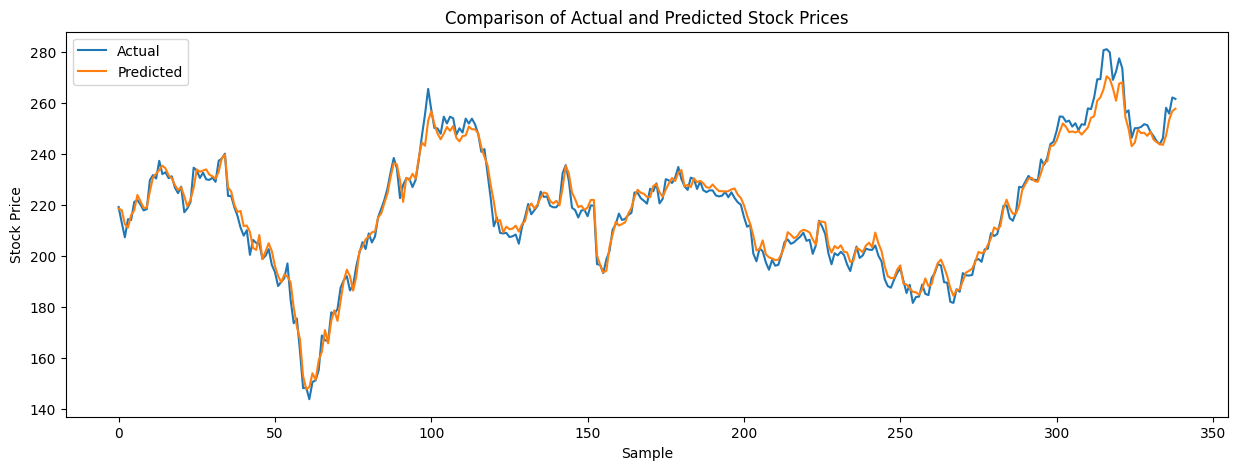

In [12]:
y_actual = scaler.inverse_transform(y_test)
y_test_series = pd.Series(y_actual.flatten(), name='Actual')
predicted_series = pd.Series(predicted_stock_price_lstm.flatten(), name='Predicted')

# Merge the actual and predicted values into a dataframe
comparison_df = pd.concat([y_test_series, predicted_series], axis=1)

# draw chart
plt.figure(figsize=(15, 5))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Google Stock Price

https://www.kaggle.com/datasets/henryshan/google-stock-price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB
different rows: 0


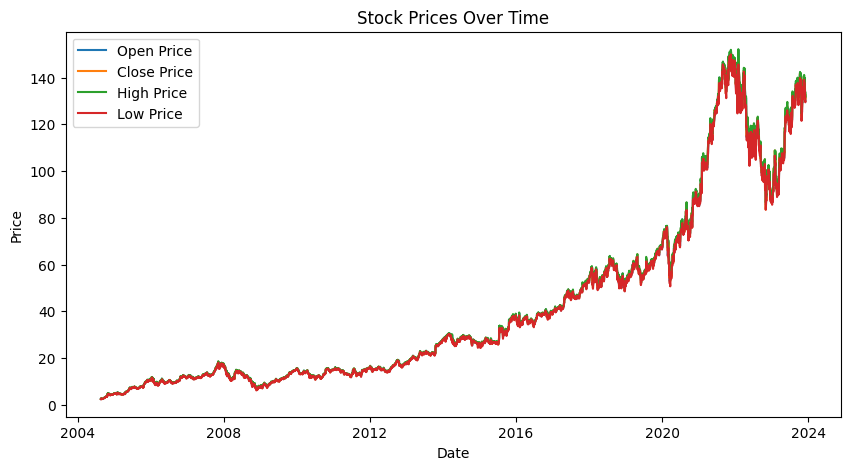

In [14]:
data = pd.read_csv('GOOG.csv')
data.head()
data.info()
data.isnull().sum()
different_rows = data['Close'] != data['Adj Close']
count_different = different_rows.sum()
print(f"different rows: {count_different}")
data.drop(columns=['Adj Close'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

show_price(data)

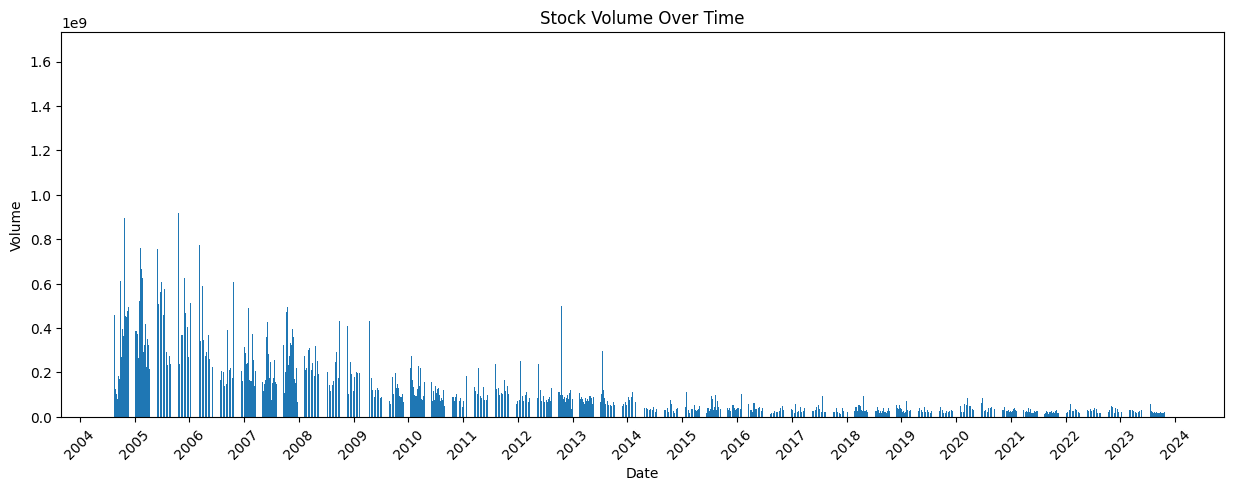

In [15]:
plt.figure(figsize=(15, 5))
plt.bar(data['Date'], data['Volume'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.xticks(rotation=45)
plt.show()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Select features to use
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Divide training set and test set
split = int(0.8 * len(data))
X_train = scaled_features[:split]
X_test = scaled_features[split:]
y_train = scaled_target[:split]
y_test = scaled_target[split:]
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=0)
y_actual = scaler.inverse_transform(y_test)

# Adjust the data format to fit the LSTM model (number of samples, time steps, number of features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


# train
model.fit(X_train, y_train, epochs=50, batch_size=32)

# predict
predicted_stock_price = model.predict(X_test)

# Denormalize to get the actual predicted price
predicted_stock_price_lstm = scaler.inverse_transform(predicted_stock_price)


Epoch 1/50
122/122 [==============================] - 5s 5ms/step - loss: 0.0076
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 4.4090e-04
Epoch 3/50
122/122 [==============================] - 1s 6ms/step - loss: 3.3909e-04
Epoch 4/50
122/122 [==============================] - 1s 7ms/step - loss: 2.9334e-04
Epoch 5/50
122/122 [==============================] - 1s 7ms/step - loss: 2.8072e-04
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 2.4571e-04
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 2.4407e-04
Epoch 8/50
122/122 [==============================] - 1s 5ms/step - loss: 2.2040e-04
Epoch 9/50
122/122 [==============================] - 1s 5ms/step - loss: 2.1308e-04
Epoch 10/50
122/122 [==============================] - 1s 5ms/step - loss: 1.9828e-04
Epoch 11/50
122/122 [==============================] - 1s 5ms/step - loss: 1.9269e-04
Epoch 12/50
122/122 [==============================] - 1s 5ms/step 

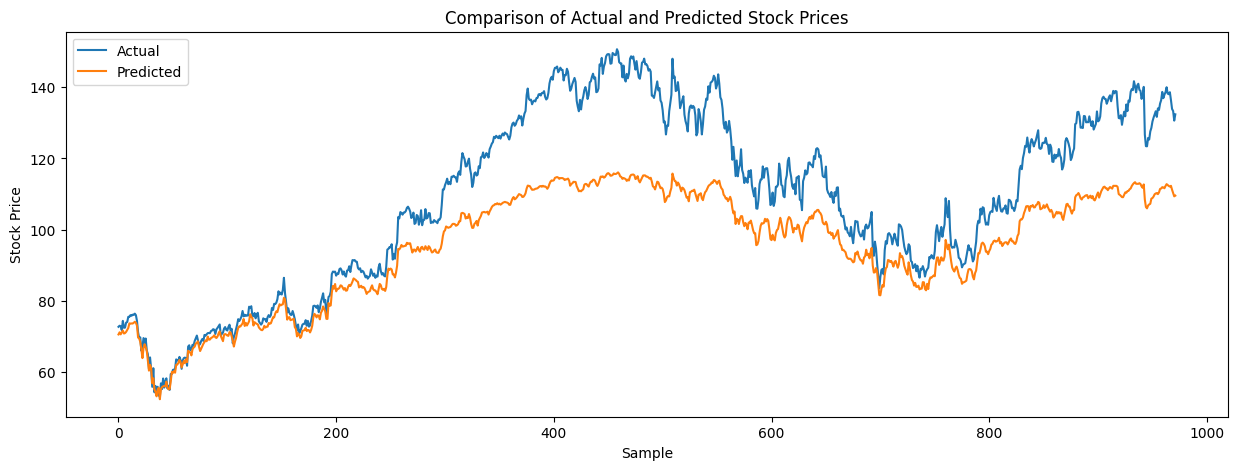

In [19]:
y_actual = scaler.inverse_transform(y_test)
y_test_series = pd.Series(y_actual.flatten(), name='Actual')
predicted_series = pd.Series(predicted_stock_price_lstm.flatten(), name='Predicted')

# Merge the actual and predicted values into a dataframe
comparison_df = pd.concat([y_test_series, predicted_series], axis=1)

# draw chart
plt.figure(figsize=(15, 5))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.legend()
plt.show()